# Predicting Electricity Consumption - Classification Model

The dataset used for this project is located here: https://www.eia.gov/consumption/residential/data/2009/index.php?view=microdata
        
The goal of the project is to build a model that predicts the electricity consumption (the 'KWH' field). 

In this project, Classification model - RandomForestClassifier - is applied to predict consumption, and GridSearch is used to find optimized hyperparameters.  

During the preprocessing stage, I split the values of the following columns: 'ACROOMS', 'HEATROOM', 'MONEYPY', 'KWH' (same as 'label') into groups (categories) to make them more suitable for Classification model. All the selected variables/features were sorted into Numerical and Categorical. Categorical columns were OneHotCoded.  

The performance of the Classification model can be improved if feature selection analysis is conducted more thouroughly, and NaN/missing values are better handled (these values were coded as '-2' in this dataset ). Due to the time limit, I had to spend little time on these two mentioned processes. 

The result achieved - prediction accuracy of 69.73%.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [2]:
data_files = pd.read_csv("recs2009_public.csv")
pd.set_option("display.max_columns", None)
data_files.head()

,DOEID,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,Climate_Region_Pub,AIA_Zone,METROMICRO,UR,KOWNRENT,CONDCOOP,YEARMADE,YEARMADERANGE,OCCUPYYRANGE,CONVERSION,ORIG1FAM,LOOKLIKE,NUMFLRS,NUMAPTS,WALLTYPE,ROOFTYPE,STUDIO,NAPTFLRS,STORIES,TYPEHUQ4,BEDROOMS,NCOMBATH,NHAFBATH,OTHROOMS,TOTROOMS,CELLAR,CRAWL,CONCRETE,BASEFIN,FINBASERMS,BASEHEAT,BASEHT2,PCTBSTHT,BASECOOL,BASECL2,PCTBSTCL,BASEUSE,ATTIC,ATTICFIN,FINATTRMS,ATTCHEAT,ATTCHT2,PCTATTHT,ATTCCOOL,ATTCCL2,PCTATTCL,ATTICUSE,PRKGPLC1,SIZEOFGARAGE,GARGLOC,GARGHEAT,GARGCOOL,PRKGPLC2,SIZEOFDETACH,OUTLET,ZKOWNRENT,ZCONDCOOP,ZYEARMADE,ZYEARMADERANGE,ZOCCUPYYRANGE,ZCONVERSION,ZORIG1FAM,ZLOOKLIKE,ZNUMFLRS,ZNUMAPTS,ZWALLTYPE,ZROOFTYPE,ZSTUDIO,ZNAPTFLRS,ZSTORIES,ZTYPEHUQ4,ZBEDROOMS,ZNCOMBATH,ZNHAFBATH,ZOTHROOMS,ZCELLAR,ZCRAWL,ZCONCRETE,ZBASEFIN,ZFINBASERMS,ZBASEHEAT,ZBASEHT2,ZPCTBSTHT,ZBASECOOL,ZBASECL2,ZPCTBSTCL,ZBASEUSE,ZATTIC,ZATTICFIN,ZFINATTRMS,ZATTCHEAT,ZATTCHT2,ZPCTATTHT,ZATTCCOOL,ZPCTATTCL,ZATTCCL2,ZATTICUSE,ZPRKGPLC1,ZSIZEOFGARAGE,ZGARGLOC,ZGARGHEAT,ZGARGCOOL,ZPRKGPLC2,ZSIZEOFDETACH,STOVEN,STOVENFUEL,STOVE,STOVEFUEL,OVEN,OVENFUEL,OVENUSE,OVENCLN,TYPECLN,MICRO,AMTMICRO,DEFROST,OUTGRILL,OUTGRILLFUEL,TOPGRILL,STGRILA,TOASTER,NUMMEAL,FUELFOOD,COFFEE,NUMFRIG,TYPERFR1,SIZRFRI1,REFRIGT1,ICE,AGERFRI1,ESFRIG,REPLCFRI,HELPFRI,HELPFRIY,TYPERFR2,SIZRFRI2,REFRIGT2,MONRFRI2,AGERFRI2,ESFRIG2,TYPERFR3,SIZRFRI3,REFRIGT3,MONRFRI3,AGERFRI3,ESFRIG3,SEPFREEZ,NUMFREEZ,UPRTFRZR,SIZFREEZ,FREEZER,AGEFRZR,REPLCFRZ,HELPFRZ,HELPFRZY,UPRTFRZR2,SIZFREEZ2,FREEZER2,AGEFRZR2,DISHWASH,DWASHUSE,AGEDW,ESDISHW,REPLCDW,HELPDW,HELPDWY,ZSTOVEN,ZSTOVENFUEL,ZSTOVE,ZSTOVEFUEL,ZOVEN,ZOVENFUEL,ZOVENUSE,ZOVENCLN,ZTYPECLN,ZMICRO,ZAMTMICRO,ZDEFROST,ZOUTGRILL,ZOUTGRILLFUEL,ZTOPGRILL,ZSTGRILA,ZTOASTER,ZNUMMEAL,ZFUELFOOD,ZCOFFEE,ZNUMFRIG,ZTYPERFR1,ZSIZRFRI1,ZREFRIGT1,ZICE,ZAGERFRI1,ZTYPERFR2,ZSIZRFRI2,ZREFRIGT2,ZMONRFRI2,ZAGERFRI2,ZTYPERFR3,ZSIZRFRI3,ZREFRIGT3,ZMONRFRI3,ZAGERFRI3,ZSEPFREEZ,ZNUMFREEZ,ZUPRTFRZR,ZSIZFREEZ,ZFREEZER,ZAGEFRZR,ZUPRTFRZR2,ZSIZFREEZ2,ZFREEZER2,ZAGEFRZR2,ZDISHWASH,ZDWASHUSE,ZAGEDW,CWASHER,TOPFRONT,WASHLOAD,WASHTEMP,RNSETEMP,AGECWASH,ESCWASH,REPLCCW,HELPCW,HELPCWY,DRYER,DRYRFUEL,DRYRUSE,AGECDRYER,TVCOLOR,TVSIZE1,TVTYPE1,CABLESAT1,COMBODVR1,DVR1,DIGITSTB1,PLAYSTA1,COMBOVCRDVD1,VCR1,DVD1,TVAUDIOSYS1,OTHERSTB1,TVONWD1,TVONWDWATCH1,TVONWE1,TVONWEWATCH1,TVSIZE2,TVTYPE2,CABLESAT2,COMBODVR2,DVR2,DIGITSTB2,PLAYSTA2,COMBOVCRDVD2,VCR2,DVD2,TVAUDIOSYS2,OTHERSTB2,TVONWD2,TVONWDWATCH2,TVONWE2,TVONWEWATCH2,TVSIZE3,TVTYPE3,CABLESAT3,COMBODVR3,DVR3,DIGITSTB3,PLAYSTA3,COMBOVCRDVD3,VCR3,DVD3,TVAUDIOSYS3,OTHERSTB3,TVONWD3,TVONWDWATCH3,TVONWE3,TVONWEWATCH3,COMPUTER,NUMPC,PCTYPE1,MONITOR1,TIMEON1,PCONOFF1,PCSLEEP1,PCTYPE2,MONITOR2,TIMEON2,PCONOFF2,PCSLEEP2,PCTYPE3,MONITOR3,TIMEON3,PCONOFF3,PCSLEEP3,INTERNET,INDIALUP,INDSL,INCABLE,INSATEL,INWIRELESS,PCPRINT,FAX,COPIER,WELLPUMP,DIPSTICK,SWAMPCOL,AQUARIUM,STEREO,NOCORD,ANSMACH,BATTOOLS,BATCHRG,CHRGPLGT,ELECDEV,ELECCHRG,CHRGPLGE,ZCWASHER,ZTOPFRONT,ZWASHLOAD,ZWASHTEMP,ZRNSETEMP,ZAGECWASH,ZDRYER,ZDRYRFUEL,ZDRYRUSE,ZAGECDRYER,ZTVCOLOR,ZTVSIZE1,ZTVTYPE1,ZCABLESAT1,ZCOMBODVR1,ZDVR1,ZDIGITSTB1,ZPLAYSTA1,ZCOMBOVCRDVD1,ZVCR1,ZDVD1,ZTVAUDIOSYS1,ZOTHERSTB1,ZTVONWD1,ZTVONWDWATCH1,ZTVONWE1,ZTVONWEWATCH1,ZTVSIZE2,ZTVTYPE2,ZCABLESAT2,ZCOMBODVR2,ZDVR2,ZDIGITSTB2,ZPLAYSTA2,ZCOMBOVCRDVD2,ZVCR2,ZDVD2,ZTVAUDIOSYS2,ZOTHERSTB2,ZTVONWD2,ZTVONWDWATCH2,ZTVONWE2,ZTVONWEWATCH2,ZTVSIZE3,ZTVTYPE3,ZCABLESAT3,ZCOMBODVR3,ZDVR3,ZDIGITSTB3,ZPLAYSTA3,ZCOMBOVCRDVD3,ZVCR3,ZDVD3,ZTVAUDIOSYS3,ZOTHERSTB3,ZTVONWD3,ZTVONWDWATCH3,ZTVONWE3,ZTVONWEWATCH3,ZCOMPUTER,ZNUMPC,ZPCTYPE1,ZMONITOR1,ZTIMEON1,ZPCONOFF1,ZPCSLEEP1,ZPCTYPE2,ZMONITOR2,ZTIMEON2,ZPCONOFF2,ZPCSLEEP2,ZPCTYPE3,ZMONITOR3,ZTIMEON3,ZPCONOFF3,ZPCSLEEP3,ZINTERNET,ZINDIALUP,ZINDSL,ZINCABLE,ZINSATEL,ZINWIRELESS,ZPCPRINT,ZFAX,ZCOPIER,ZWELLPUMP,ZDIPSTICK,ZSWAMPCOL,ZAQUARIUM,ZSTEREO,ZNOCORD,ZANSMACH,ZBATTOOLS,ZBATCHRG,ZCHRGPLGT,ZELECDEV,ZELECCHRG,ZCHRGPLGE,HEATHOME,DNTHEAT,EQUIPNOHEAT,FUELNOHEAT,EQUIPM,FUELHEAT,MAINTHT,EQUIPAGE,REPLCHT,HE

In [3]:
# The following variables were selected to be used in the model.  
#Below feature importance analysis is conducted and plotted.

df_data = data_files[['DOEID', 'TYPEHUQ', 'NWEIGHT', 'HDD30YR', 'CDD30YR', 
'Climate_Region_Pub', 'AIA_Zone', 'YEARMADERANGE', 'WALLTYPE', 
'ROOFTYPE', 'BEDROOMS', 'TOTROOMS', 'HEATHOME', 'FUELHEAT',
'MAINTHT', 'EQUIPAGE', 'REPLCHT', 'EQUIPAUX', 'HEATROOM',
'THERMAIN', 'MOISTURE', 'H2OTYPE1', 'FUELH2O',
'WHEATAGE', 'AIRCOND', 'COOLTYPE', 'AGECENAC', 'ACROOMS',
'NOTMOIST', 'TOTSQFT','MONEYPY', 'HDD50', 'CDD80', 'KWH']]

# df_data.head(20)

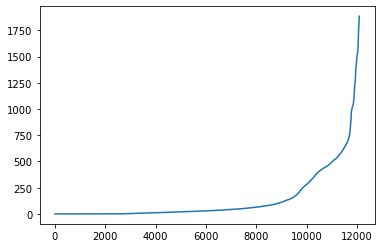

In [4]:
# The following variables are plotted and visualized to analyse the data:
#'DOEID', 'TYPEHUQ', 'NWEIGHT', 'HDD30YR', 'CDD30YR','MONEYPY',  'ACROOMS', 'HEATROOM', 'CDD80'

x_val = range(df_data.shape[0])
# plt.plot(x_val, df_data['DOEID'])
# df_data['CDD80'].value_counts()
plt.plot(x_val, df_data['CDD80'].sort_values())
plt.show()

-2     4647
 6     1541
 5     1433
 7     1166
 4     1037
 8      778
 3      436
 9      424
 10     211
 1      120
 2      108
 11      95
 12      47
 13      19
 14      11
 15       3
 16       2
 17       2
 19       1
 18       1
 23       1
Name: ACROOMS, dtype: int64

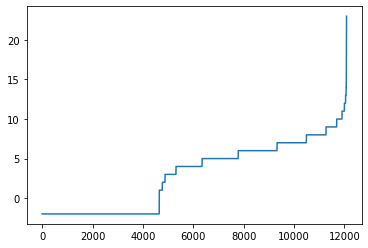

1    6348
2    5342
3     393
Name: ACROOMS, dtype: int64

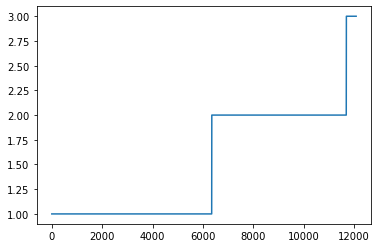

In [5]:
#Splitting the values of 'ACROOMS' column into groups (categories) and plotting them
df_data['ACROOMS'].value_counts()
plt.plot(x_val, df_data['ACROOMS'].sort_values())
plt.show()

cut_offs =[-2, 5, 10]
df_data.loc[(df_data['ACROOMS']>=cut_offs[0]) & (df_data['ACROOMS']<cut_offs[1]), 'ACROOMS']=1
df_data.loc[(df_data['ACROOMS']>=cut_offs[1]) & (df_data['ACROOMS']<cut_offs[2]), 'ACROOMS']=2
df_data.loc[df_data['ACROOMS']>=cut_offs[2], 'ACROOMS']=3

df_data['ACROOMS'].value_counts()
plt.plot(x_val, df_data['ACROOMS'].sort_values())
plt.show()

 6     2158
 5     2133
 4     1804
 7     1556
 8     1072
 3     1034
 9      566
-2      446
 1      400
 2      372
 10     292
 11     126
 12      63
 13      33
 14      15
 15       5
 16       3
 17       2
 19       1
 18       1
 23       1
Name: HEATROOM, dtype: int64

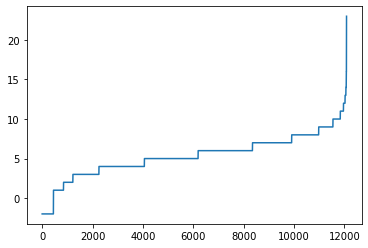

2    7485
1    4056
3     542
Name: HEATROOM, dtype: int64

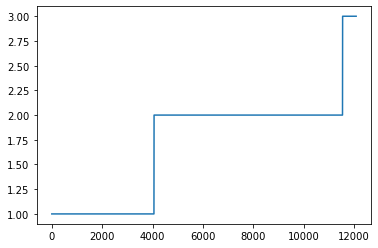

In [6]:
#Splitting the values of 'HEATROOM' column into groups (categories) and plotting them
df_data['HEATROOM'].value_counts()
plt.plot(x_val, df_data['HEATROOM'].sort_values())
plt.show()

cut_offs =[-2, 5, 10]
df_data.loc[(df_data['HEATROOM']>=cut_offs[0]) & (df_data['HEATROOM']<cut_offs[1]), 'HEATROOM']=1
df_data.loc[(df_data['HEATROOM']>=cut_offs[1]) & (df_data['HEATROOM']<cut_offs[2]), 'HEATROOM']=2
df_data.loc[df_data['HEATROOM']>=cut_offs[2], 'HEATROOM']=3

df_data['HEATROOM'].value_counts()
plt.plot(x_val, df_data['HEATROOM'].sort_values())
plt.show()

24    1389
12     787
8      755
7      746
9      698
5      686
10     671
23     653
11     622
6      602
13     526
15     450
16     406
17     393
14     374
4      328
1      310
18     302
19     289
20     287
22     250
21     231
3      176
2      152
Name: MONEYPY, dtype: int64

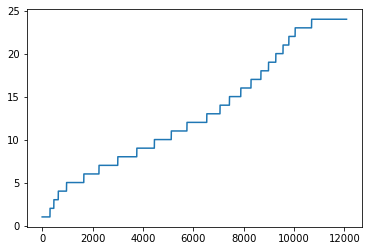

1    3487
2    2980
4    2810
3    1840
0     966
Name: MONEYPY, dtype: int64

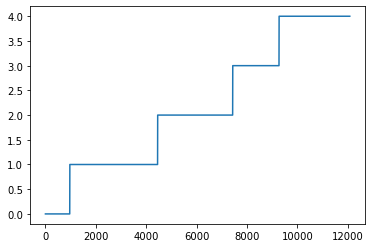

In [7]:
#Splitting the values of 'MONEYPY' column into groups (categories) and plotting them
df_data['MONEYPY'].value_counts()
plt.plot(x_val, df_data['MONEYPY'].sort_values())
plt.show()

cut_offs =[5, 10, 15, 20]
df_data.loc[(df_data['MONEYPY']<cut_offs[0]), 'MONEYPY']=0
df_data.loc[(df_data['MONEYPY']>=cut_offs[0]) & (df_data['MONEYPY']<cut_offs[1]), 'MONEYPY']=1
df_data.loc[(df_data['MONEYPY']>=cut_offs[1]) & (df_data['MONEYPY']<cut_offs[2]), 'MONEYPY']=2
df_data.loc[(df_data['MONEYPY']>=cut_offs[2]) & (df_data['MONEYPY']<cut_offs[3]), 'MONEYPY']=3
df_data.loc[df_data['MONEYPY']>=cut_offs[3], 'MONEYPY']=4

df_data['MONEYPY'].value_counts()
plt.plot(x_val, df_data['MONEYPY'].sort_values())
plt.show()

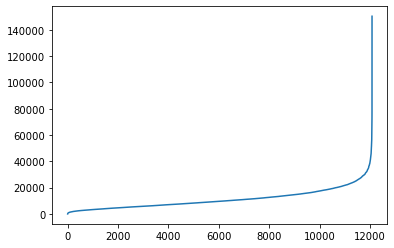

In [8]:
#Plotting the values of 'KWH' ('label') column
x_val = range(df_data.shape[0])
plt.plot(x_val,df_data['KWH'].sort_values())
plt.show()

In [9]:
#Splitting the values of 'KWH' column into groups (categories) and renaming the column into 'label'
cut_offs =[4000, 10000]
df_data['label']=0
df_data.loc[(df_data['KWH']>=cut_offs[0]) & (df_data['KWH']<cut_offs[1]), 'label']=1
df_data.loc[df_data['KWH']>=cut_offs[1], 'label']=2

df_data[:5]

,DOEID,TYPEHUQ,NWEIGHT,HDD30YR,CDD30YR,Climate_Region_Pub,AIA_Zone,YEARMADERANGE,WALLTYPE,ROOFTYPE,BEDROOMS,TOTROOMS,HEATHOME,FUELHEAT,MAINTHT,EQUIPAGE,REPLCHT,EQUIPAUX,HEATROOM,THERMAIN,MOISTURE,H2OTYPE1,FUELH2O,WHEATAGE,AIRCOND,COOLTYPE,AGECENAC,ACROOMS,NOTMOIST,TOTSQFT,MONEYPY,HDD50,CDD80,KWH,label
0,1,2,2471.68,4953,1271,4,3,7,1,5,4,9,1,5,0,3,-2,0,2,1,0,1,5,3,1,1,3,2,0,5075,4,2117,56,18466,2
1,2,2,8599.17,2688,143,5,4,6,2,2,3,4,1,1,0,41,-2,1,1,1,0,1,1,41,1,1,41,1,0,3136,1,62,26,5148,1
2,3,5,8969.92,5741,829,1,2,3,1,-2,1,2,1,1,0,2,0,0,1,1,0,1,1,5,1,2,-2,1,0,528,3,2346,49,2218,0
3,4,2,18003.64,5781,868,1,2,5,6,5,3,7,1,1,1,3,-2,0,2,1,1,1,5,2,1,1,2,2,0,2023,2,2746,0,10015,2
4,5,3,5999.61,5313,797,1,3,5,2,5,2,5,1,1,1,1,1,0,2,1,0,1,1,3,0,-2,-2,1,0,1912,4,2251,0,2869,0


In [10]:
#Dropping 'DOEID' and 'KWH' columns
df_data.drop(['DOEID', 'KWH'],axis=1,inplace=True)
df_data[:5]

,TYPEHUQ,NWEIGHT,HDD30YR,CDD30YR,Climate_Region_Pub,AIA_Zone,YEARMADERANGE,WALLTYPE,ROOFTYPE,BEDROOMS,TOTROOMS,HEATHOME,FUELHEAT,MAINTHT,EQUIPAGE,REPLCHT,EQUIPAUX,HEATROOM,THERMAIN,MOISTURE,H2OTYPE1,FUELH2O,WHEATAGE,AIRCOND,COOLTYPE,AGECENAC,ACROOMS,NOTMOIST,TOTSQFT,MONEYPY,HDD50,CDD80,label
0,2,2471.68,4953,1271,4,3,7,1,5,4,9,1,5,0,3,-2,0,2,1,0,1,5,3,1,1,3,2,0,5075,4,2117,56,2
1,2,8599.17,2688,143,5,4,6,2,2,3,4,1,1,0,41,-2,1,1,1,0,1,1,41,1,1,41,1,0,3136,1,62,26,1
2,5,8969.92,5741,829,1,2,3,1,-2,1,2,1,1,0,2,0,0,1,1,0,1,1,5,1,2,-2,1,0,528,3,2346,49,0
3,2,18003.64,5781,868,1,2,5,6,5,3,7,1,1,1,3,-2,0,2,1,1,1,5,2,1,1,2,2,0,2023,2,2746,0,2
4,3,5999.61,5313,797,1,3,5,2,5,2,5,1,1,1,1,1,0,2,1,0,1,1,3,0,-2,-2,1,0,1912,4,2251,0,0


In [11]:
#Sorting the variables into Numerical and Categorical

num_cols = ['NWEIGHT', 'HDD30YR', 'CDD30YR', 'TOTSQFT', 'HDD50', 'CDD80','label']
df_data[num_cols][:5]
# Need to OneHotEncode the following columns: 
categ_cols = ['TYPEHUQ', 'Climate_Region_Pub', 'AIA_Zone', 'YEARMADERANGE', 'WALLTYPE', 'ROOFTYPE', 
'HEATHOME', 'FUELHEAT', 'MAINTHT', 'EQUIPAGE', 'REPLCHT', 'EQUIPAUX', 'THERMAIN', 
'MOISTURE', 'H2OTYPE1', 'FUELH2O',
'WHEATAGE', 'AIRCOND', 'COOLTYPE', 'AGECENAC', 'HEATROOM', 'ACROOMS','NOTMOIST', 'MONEYPY']
df_data[categ_cols][:5]

,NWEIGHT,HDD30YR,CDD30YR,TOTSQFT,HDD50,CDD80,label
0,2471.68,4953,1271,5075,2117,56,2
1,8599.17,2688,143,3136,62,26,1
2,8969.92,5741,829,528,2346,49,0
3,18003.64,5781,868,2023,2746,0,2
4,5999.61,5313,797,1912,2251,0,0


,TYPEHUQ,Climate_Region_Pub,AIA_Zone,YEARMADERANGE,WALLTYPE,ROOFTYPE,HEATHOME,FUELHEAT,MAINTHT,EQUIPAGE,REPLCHT,EQUIPAUX,THERMAIN,MOISTURE,H2OTYPE1,FUELH2O,WHEATAGE,AIRCOND,COOLTYPE,AGECENAC,HEATROOM,ACROOMS,NOTMOIST,MONEYPY
0,2,4,3,7,1,5,1,5,0,3,-2,0,1,0,1,5,3,1,1,3,2,2,0,4
1,2,5,4,6,2,2,1,1,0,41,-2,1,1,0,1,1,41,1,1,41,1,1,0,1
2,5,1,2,3,1,-2,1,1,0,2,0,0,1,0,1,1,5,1,2,-2,1,1,0,3
3,2,1,2,5,6,5,1,1,1,3,-2,0,1,1,1,5,2,1,1,2,2,2,0,2
4,3,1,3,5,2,5,1,1,1,1,1,0,1,0,1,1,3,0,-2,-2,2,1,0,4


In [12]:
#OneHotEncoding of Categorical Columns
df_onecode = df_data[categ_cols].copy()
df_onecode.shape
for cur_col in df_onecode.columns:
    dummy_col = pd.get_dummies(df_onecode[cur_col], prefix=cur_col+'_')
#     dummy_col[:5]
    df_onecode = pd.merge(left=df_onecode, right=dummy_col, left_index=True, right_index=True)
#     df_onecode[:5]

df_onecode.shape
# df_onecode[:5]
df_onecode.drop(categ_cols,axis=1,inplace=True)
df_onecode.shape
df_onecode[:5]

(12083, 24)

(12083, 144)

(12083, 120)

,TYPEHUQ__1,TYPEHUQ__2,TYPEHUQ__3,TYPEHUQ__4,TYPEHUQ__5,Climate_Region_Pub__1,Climate_Region_Pub__2,Climate_Region_Pub__3,Climate_Region_Pub__4,Climate_Region_Pub__5,AIA_Zone__1,AIA_Zone__2,AIA_Zone__3,AIA_Zone__4,AIA_Zone__5,YEARMADERANGE__1,YEARMADERANGE__2,YEARMADERANGE__3,YEARMADERANGE__4,YEARMADERANGE__5,YEARMADERANGE__6,YEARMADERANGE__7,YEARMADERANGE__8,WALLTYPE__1,WALLTYPE__2,WALLTYPE__3,WALLTYPE__4,WALLTYPE__5,WALLTYPE__6,WALLTYPE__7,WALLTYPE__8,WALLTYPE__9,ROOFTYPE__-2,ROOFTYPE__1,ROOFTYPE__2,ROOFTYPE__3,ROOFTYPE__4,ROOFTYPE__5,ROOFTYPE__6,ROOFTYPE__7,ROOFTYPE__8,HEATHOME__0,HEATHOME__1,FUELHEAT__-2,FUELHEAT__1,FUELHEAT__2,FUELHEAT__3,FUELHEAT__4,FUELHEAT__5,FUELHEAT__7,FUELHEAT__8,FUELHEAT__9,FUELHEAT__21,MAINTHT__-2,MAINTHT__0,MAINTHT__1,EQUIPAGE__-2,EQUIPAGE__1,EQUIPAGE__2,EQUIPAGE__3,EQUIPAGE__5,EQUIPAGE__41,EQUIPAGE__42,REPLCHT__-9,REPLCHT__-2,REPLCHT__0,REPLCHT__1,EQUIPAUX__-2,EQUIPAUX__0,EQUIPAUX__1,THERMAIN__-2,THERMAIN__0,THERMAIN__1,MOISTURE__0,MOISTURE__1,H2OTYPE1__-2,H2OTYPE1__1,H2OTYPE1__2,FUELH2O__-2,FUELH2O__1,FUELH2O__2,FUELH2O__3,FUELH2O__4,FUELH2O__5,FUELH2O__7,FUELH2O__8,FUELH2O__21,WHEATAGE__-2,WHEATAGE__1,WHEATAGE__2,WHEATAGE__3,WHEATAGE__5,WHEATAGE__41,WHEATAGE__42,AIRCOND__0,AIRCOND__1,COOLTYPE__-2,COOLTYPE__1,COOLTYPE__2,COOLTYPE__3,AGECENAC__-2,AGECENAC__1,AGECENAC__2,AGECENAC__3,AGECENAC__5,AGECENAC__41,AGECENAC__42,HEATROOM__1,HEATROOM__2,HEATROOM__3,ACROOMS__1,ACROOMS__2,ACROOMS__3,NOTMOIST__0,NOTMOIST__1,MONEYPY__0,MONEYPY__1,MONEYPY__2,MONEYPY__3,MONEYPY__4
0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0
2,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1


In [13]:
#Merging new one-hot encoded columns with the numerical dataset
df_data.drop(categ_cols,axis=1,inplace=True)
df_data[:5]
df_data = pd.concat([df_onecode, df_data], axis=1)
df_data[:5]

,NWEIGHT,HDD30YR,CDD30YR,BEDROOMS,TOTROOMS,TOTSQFT,HDD50,CDD80,label
0,2471.68,4953,1271,4,9,5075,2117,56,2
1,8599.17,2688,143,3,4,3136,62,26,1
2,8969.92,5741,829,1,2,528,2346,49,0
3,18003.64,5781,868,3,7,2023,2746,0,2
4,5999.61,5313,797,2,5,1912,2251,0,0


,TYPEHUQ__1,TYPEHUQ__2,TYPEHUQ__3,TYPEHUQ__4,TYPEHUQ__5,Climate_Region_Pub__1,Climate_Region_Pub__2,Climate_Region_Pub__3,Climate_Region_Pub__4,Climate_Region_Pub__5,AIA_Zone__1,AIA_Zone__2,AIA_Zone__3,AIA_Zone__4,AIA_Zone__5,YEARMADERANGE__1,YEARMADERANGE__2,YEARMADERANGE__3,YEARMADERANGE__4,YEARMADERANGE__5,YEARMADERANGE__6,YEARMADERANGE__7,YEARMADERANGE__8,WALLTYPE__1,WALLTYPE__2,WALLTYPE__3,WALLTYPE__4,WALLTYPE__5,WALLTYPE__6,WALLTYPE__7,WALLTYPE__8,WALLTYPE__9,ROOFTYPE__-2,ROOFTYPE__1,ROOFTYPE__2,ROOFTYPE__3,ROOFTYPE__4,ROOFTYPE__5,ROOFTYPE__6,ROOFTYPE__7,ROOFTYPE__8,HEATHOME__0,HEATHOME__1,FUELHEAT__-2,FUELHEAT__1,FUELHEAT__2,FUELHEAT__3,FUELHEAT__4,FUELHEAT__5,FUELHEAT__7,FUELHEAT__8,FUELHEAT__9,FUELHEAT__21,MAINTHT__-2,MAINTHT__0,MAINTHT__1,EQUIPAGE__-2,EQUIPAGE__1,EQUIPAGE__2,EQUIPAGE__3,EQUIPAGE__5,EQUIPAGE__41,EQUIPAGE__42,REPLCHT__-9,REPLCHT__-2,REPLCHT__0,REPLCHT__1,EQUIPAUX__-2,EQUIPAUX__0,EQUIPAUX__1,THERMAIN__-2,THERMAIN__0,THERMAIN__1,MOISTURE__0,MOISTURE__1,H2OTYPE1__-2,H2OTYPE1__1,H2OTYPE1__2,FUELH2O__-2,FUELH2O__1,FUELH2O__2,FUELH2O__3,FUELH2O__4,FUELH2O__5,FUELH2O__7,FUELH2O__8,FUELH2O__21,WHEATAGE__-2,WHEATAGE__1,WHEATAGE__2,WHEATAGE__3,WHEATAGE__5,WHEATAGE__41,WHEATAGE__42,AIRCOND__0,AIRCOND__1,COOLTYPE__-2,COOLTYPE__1,COOLTYPE__2,COOLTYPE__3,AGECENAC__-2,AGECENAC__1,AGECENAC__2,AGECENAC__3,AGECENAC__5,AGECENAC__41,AGECENAC__42,HEATROOM__1,HEATROOM__2,HEATROOM__3,ACROOMS__1,ACROOMS__2,ACROOMS__3,NOTMOIST__0,NOTMOIST__1,MONEYPY__0,MONEYPY__1,MONEYPY__2,MONEYPY__3,MONEYPY__4,NWEIGHT,HDD30YR,CDD30YR,BEDROOMS,TOTROOMS,TOTSQFT,HDD50,CDD80,label
0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,2471.68,4953,1271,4,9,5075,2117,56,2
1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,8599.17,2688,143,3,4,3136,62,26,1
2,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,8969.92,5741,829,1,2,528,2346,49,0
3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,18003.64,5781,868,3,7,2023,2746,0,2
4,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,5999.61,5313,797,2,5,1912,2251,0,0


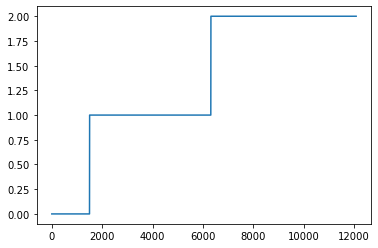

In [14]:
#Plotting 'label' column
plt.plot(range(df_data.shape[0]),df_data['label'].sort_values())
plt.show()

In [15]:
#Splitting into train and test sets
y = df_data['label']
X = df_data.drop('label',axis=1)
X.shape
X[:5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

(12083, 128)

,TYPEHUQ__1,TYPEHUQ__2,TYPEHUQ__3,TYPEHUQ__4,TYPEHUQ__5,Climate_Region_Pub__1,Climate_Region_Pub__2,Climate_Region_Pub__3,Climate_Region_Pub__4,Climate_Region_Pub__5,AIA_Zone__1,AIA_Zone__2,AIA_Zone__3,AIA_Zone__4,AIA_Zone__5,YEARMADERANGE__1,YEARMADERANGE__2,YEARMADERANGE__3,YEARMADERANGE__4,YEARMADERANGE__5,YEARMADERANGE__6,YEARMADERANGE__7,YEARMADERANGE__8,WALLTYPE__1,WALLTYPE__2,WALLTYPE__3,WALLTYPE__4,WALLTYPE__5,WALLTYPE__6,WALLTYPE__7,WALLTYPE__8,WALLTYPE__9,ROOFTYPE__-2,ROOFTYPE__1,ROOFTYPE__2,ROOFTYPE__3,ROOFTYPE__4,ROOFTYPE__5,ROOFTYPE__6,ROOFTYPE__7,ROOFTYPE__8,HEATHOME__0,HEATHOME__1,FUELHEAT__-2,FUELHEAT__1,FUELHEAT__2,FUELHEAT__3,FUELHEAT__4,FUELHEAT__5,FUELHEAT__7,FUELHEAT__8,FUELHEAT__9,FUELHEAT__21,MAINTHT__-2,MAINTHT__0,MAINTHT__1,EQUIPAGE__-2,EQUIPAGE__1,EQUIPAGE__2,EQUIPAGE__3,EQUIPAGE__5,EQUIPAGE__41,EQUIPAGE__42,REPLCHT__-9,REPLCHT__-2,REPLCHT__0,REPLCHT__1,EQUIPAUX__-2,EQUIPAUX__0,EQUIPAUX__1,THERMAIN__-2,THERMAIN__0,THERMAIN__1,MOISTURE__0,MOISTURE__1,H2OTYPE1__-2,H2OTYPE1__1,H2OTYPE1__2,FUELH2O__-2,FUELH2O__1,FUELH2O__2,FUELH2O__3,FUELH2O__4,FUELH2O__5,FUELH2O__7,FUELH2O__8,FUELH2O__21,WHEATAGE__-2,WHEATAGE__1,WHEATAGE__2,WHEATAGE__3,WHEATAGE__5,WHEATAGE__41,WHEATAGE__42,AIRCOND__0,AIRCOND__1,COOLTYPE__-2,COOLTYPE__1,COOLTYPE__2,COOLTYPE__3,AGECENAC__-2,AGECENAC__1,AGECENAC__2,AGECENAC__3,AGECENAC__5,AGECENAC__41,AGECENAC__42,HEATROOM__1,HEATROOM__2,HEATROOM__3,ACROOMS__1,ACROOMS__2,ACROOMS__3,NOTMOIST__0,NOTMOIST__1,MONEYPY__0,MONEYPY__1,MONEYPY__2,MONEYPY__3,MONEYPY__4,NWEIGHT,HDD30YR,CDD30YR,BEDROOMS,TOTROOMS,TOTSQFT,HDD50,CDD80
0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,2471.68,4953,1271,4,9,5075,2117,56
1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,8599.17,2688,143,3,4,3136,62,26
2,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,8969.92,5741,829,1,2,528,2346,49
3,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,18003.64,5781,868,3,7,2023,2746,0
4,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,5999.61,5313,797,2,5,1912,2251,0


Train (9666, 128) (9666,)
Test (2417, 128) (2417,)


In [16]:
#Standardization 
sd = StandardScaler()

X_train = sd.fit_transform(X_train) 
X_test = sd.fit_transform(X_test) 

In [17]:
#RandomForest Classifier model
start = time.time()
clf = RandomForestClassifier(n_estimators=500, max_depth=12, 
                             class_weight = 'balanced', n_jobs=-1)
clf.fit(X_train, y_train)

print("  ", int(time.time()-start), "Seconds to execute")

RandomForestClassifier(class_weight='balanced', max_depth=12, n_estimators=500,
                       n_jobs=-1)

   1 Seconds to execute


In [18]:
predict = clf.predict(X_test)
proba = clf.predict_proba(X_test)
cm = confusion_matrix(y_test, predict)

print('ACC: ', accuracy_score(y_test, predict).round(2))
print('Confusion Matrix: \n', cm, '\n')
print(classification_report(y_test, predict))

ACC:  0.69
Confusion Matrix: 
 [[179 119  10]
 [144 632 209]
 [  9 256 859]] 

              precision    recall  f1-score   support

           0       0.54      0.58      0.56       308
           1       0.63      0.64      0.63       985
           2       0.80      0.76      0.78      1124

    accuracy                           0.69      2417
   macro avg       0.65      0.66      0.66      2417
weighted avg       0.70      0.69      0.69      2417



In [19]:
#Checking features importance 
train_columns = X.columns
feature_importances = pd.DataFrame(clf.feature_importances_,index = np.array(train_columns),
                                    columns=['importance']).sort_values('importance', ascending=False)
# printing first 10 features
feature_importances[:10]

,importance
TOTSQFT,0.066997
BEDROOMS,0.057544
TOTROOMS,0.049447
CDD30YR,0.046694
FUELH2O__5,0.040315
HDD50,0.036313
ACROOMS__1,0.035927
HDD30YR,0.035037
CDD80,0.032713
NWEIGHT,0.032127


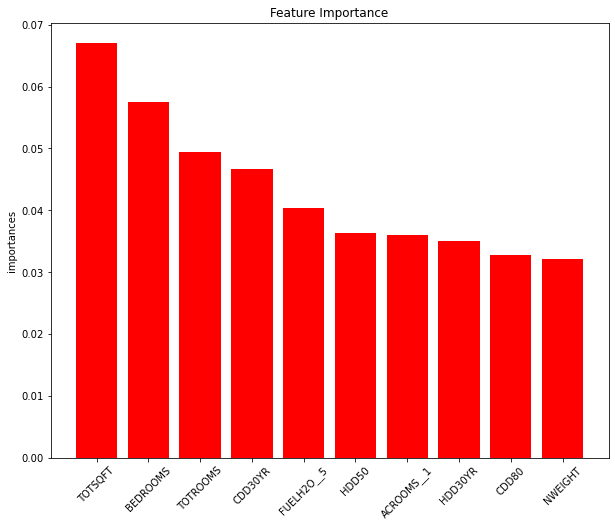

In [20]:
#Plotting Features Importance Values (first 10 features)
def plot_feature_importance(feature_importances):
    labels = feature_importances[:10].index.to_list()
    values = feature_importances['importance'][:10].values
    fig = plt.subplots(figsize=(10, 8))
    plt.bar(labels,
            values,
            align='center',
            color='red')
    plt.xticks(rotation = 45)
    plt.title('Feature Importance')
    plt.ylabel('importances')
    
plot_feature_importance(feature_importances)

In [21]:
# finding hyperparameters with GridSearchCV 
param_grid = {'n_estimators':range(200,500,700), 
          'max_depth':range(12,15,21),
         } 
params = {'n_estimators':500, 'max_depth':12,
          'criterion' :'entropy', 'warm_start': True,
          'class_weight': 'balanced'
         } 

gs = GridSearchCV(estimator = RandomForestClassifier(params), 
                  param_grid = param_grid, 
                  cv=5,
                  verbose=10,
                  n_jobs=-1)

In [22]:
start = time.time()
gs.fit(X_train,y_train)
print("  ", int(time.time()-start), "Seconds to execute")

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators={'class_weight': 'balanced',
                                                            'criterion': 'entropy',
                                                            'max_depth': 12,
                                                            'n_estimators': 500,
                                                            'warm_start': True}),
             n_jobs=-1,
             param_grid={'max_depth': range(12, 15, 21),
                         'n_estimators': range(200, 500, 700)},
             verbose=10)

   7 Seconds to execute


In [23]:
gs.best_estimator_
gs.best_params_
gs.best_score_

RandomForestClassifier(max_depth=12, n_estimators=200)

{'max_depth': 12, 'n_estimators': 200}

0.697391787230013